In [ ]:
# 구글 드라이브 입력
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# import할 요소들 정리
import copy
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import os

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

from scipy.stats import ranksums

# 파일 위치 고정
os.chdir("/content/gdrive/MyDrive/creditcardfraud")

train_df = pd.read_csv('train.csv') # Train
train_df = train_df.iloc[:,1:]

val_df = pd.read_csv('val.csv')
ori_val_df = val_df.iloc[:,1:]
val_class = val_df.iloc[:,31]
val_df = val_df.iloc[:,1:31]

test_df = pd.read_csv('test.csv') # Test
test_df = test_df.iloc[:,1:]

def change_pred(ppp):
    for jj in range(len(ppp)):
        pred_val = ppp[jj]
        if (pred_val == 1):
            ppp[jj] = 0
        else:
            ppp[jj] = 1
    return ppp         

def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

def iso_model_val(the_num, the_contamination, trtrtr, valvalval, v_class):
    model = IsolationForest(n_estimators=1000, contamination=the_contamination, verbose=0)
    
    model.fit(trtrtr)
    val_pred = model.predict(valvalval) # model prediction

    val_pred = get_pred_label(val_pred)
    val_score = f1_score(v_class, val_pred, average='macro')
    print(the_num, the_contamination)
    print(f'Validation F1 Score : [{val_score}]')
    print(classification_report(v_class, val_pred))

    return val_score

In [ ]:
import math
from random import sample
t = 100
phi = 256

X = [[-1.1], [0.3], [0.5], [100]]
clf_dlatl = IsolationForest(n_estimators=1000, random_state=100).fit(np.array(train_df))
clf_dlatl.predict(np.array(train_df))

ll = math.ceil(math.log2(phi))

for ii in range(t):


In [ ]:
from random import sample
list1 = [1, 2, 3, 4, 5] 
  
print(sample(range(60),30))

[14, 26, 27, 42, 43, 5, 28, 12, 41, 18, 16, 53, 3, 45, 30, 37, 21, 25, 9, 49, 15, 22, 32, 0, 50, 36, 34, 17, 13, 24]


In [ ]:
from sklearn.covariance import MinCovDet

var_fpdkf_chai = []
for what_val in inside_in_inlier:
    fpdkf_cov = MinCovDet(random_state=0).fit(np.array(ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)[0],what_val]).reshape(-1, 1))
    print(fpdkf_cov)
    
    print(what_val , /ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)[0],what_val].var())
    var_fpdkf_chai.append(/ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)[0],what_val].var())

old_fpdkf_born_idx = np.argsort((-1)*np.array(var_fpdkf_chai))[:3]
old_fpdkf_born_idx = np.array(inside_in_inlier)[list(old_fpdkf_born_idx)]
old_fpdkf_born_idx = list(old_fpdkf_born_idx)
print(old_fpdkf_born_idx)


In [ ]:
def iso_model_train(trtrtr, the_contamination):
    model = IsolationForest(n_estimators=1000, contamination=the_contamination, verbose=1)
    
    model.fit(trtrtr)
    train_pred = model.predict(trtrtr) # model prediction
    train_pred = get_pred_label(train_pred)

    return train_pred

def iso_model_train_score(trtrtr, the_contamination):
    model = IsolationForest(n_estimators=1000, contamination=the_contamination, verbose=1)
    
    model.fit(trtrtr)
    train_pred = model.score_samples(trtrtr) # model prediction

    return train_pred

In [ ]:
def iqr_outlier(ddff):
    q1 = ddff.quantile(0.25)
    q3 = ddff.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)

    return pd.concat([lower_bound, upper_bound], axis= 1).T

In [ ]:
iqr_outlier(ori_val_df).iloc[:,[1,2,3,6,8,9,10,11,13,15,16,17]]

,V2,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-2.700327,-3.699899,-3.239675,-2.215962,-2.501362,-2.030302,-3.005216,-1.948794,-1.778719,-1.936586,-1.784123,-1.993670
1,2.905736,3.838440,3.126275,2.236497,2.454911,1.942603,2.993048,2.159230,1.867535,1.996513,1.709413,2.011602


In [ ]:
ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].describe().iloc[:,[1,2,3,6,8,9,10,11,13,15,16,17]]

,V2,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,4.786568,-9.802422,5.458560,-7.699301,-3.318254,-7.575105,4.450152,-7.294928,-7.815109,-4.506066,-7.337685,-2.459564
std,4.424168,8.966188,3.457016,8.972103,2.628173,6.296736,2.945586,5.275763,4.374775,4.557146,7.611435,3.309919
min,-3.157307,-30.177317,-0.475243,-31.197329,-9.462573,-22.187089,-0.414575,-16.060306,-14.952981,-12.675269,-20.740664,-8.153668
25%,2.037991,-19.291390,2.363491,-14.062955,-4.492970,-12.981191,1.932711,-10.710270,-11.666353,-7.830285,-13.804295,-5.365815
50%,3.554256,-5.751937,5.809762,-2.904659,-2.645584,-5.035110,4.512084,-7.414933,-7.313416,-3.412949,-6.068812,-2.257294
75%,7.313459,-3.148428,7.465780,-1.267929,-1.416384,-2.965854,6.257859,-3.134222,-5.230587,-0.889838,-0.629108,0.401356
max,16.497472,1.123320,12.114672,1.744086,0.577829,-0.194120,10.853012,0.728903,0.727242,2.375296,6.443510,2.591846


In [ ]:
ori_val_df.describe().iloc[np.where(ori_val_df['Class'] == 0)],[1,2,3,6,8,9,10,11,13,15,16,17,23,29]]

,V2,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,V24,V30
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,0.002014,0.001414,0.001893,0.005556,-0.004905,-0.002299,0.004007,0.002480,0.012299,0.004913,0.007552,0.005733,0.001355,0.119916
std,1.605198,1.499749,1.405139,1.165132,1.090843,1.084560,1.016507,0.990731,0.938752,0.864289,0.821528,0.833280,0.603181,0.558246
min,-38.305310,-30.177317,-5.071241,-31.197329,-9.462573,-22.187089,-4.453853,-16.060306,-14.952981,-12.675269,-20.740664,-8.153668,-2.807897,-0.994878
25%,-0.598053,-0.873022,-0.852444,-0.546290,-0.642760,-0.540463,-0.755867,-0.408285,-0.411374,-0.461673,-0.474047,-0.491693,-0.352310,-0.357884
50%,0.075470,0.175784,-0.021619,0.046280,-0.066623,-0.099386,-0.033527,0.137370,0.059680,0.070931,-0.066174,0.000890,0.040076,0.002156
75%,0.803463,1.011563,0.739044,0.566825,0.596308,0.452763,0.743699,0.618721,0.500190,0.521601,0.399337,0.509625,0.441402,0.641828
max,16.497472,4.226108,12.114672,26.237722,7.937413,12.161890,10.853012,4.202685,7.692209,4.462229,6.983545,3.505916,3.658746,1.034975


In [ ]:
ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)[0]].describe().iloc[:,[23,29]]

,V24,V30
count,28432.000000,28432.000000
mean,0.001554,0.120106
std,0.603244,0.558146
min,-2.807897,-0.994878
25%,-0.352230,-0.357679
50%,0.040176,0.002408
75%,0.441544,0.641860
max,3.658746,1.034975


In [ ]:
for what_val in range(30):
    if ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].max()[what_val] < iqr_outlier(ori_val_df).iloc[1,what_val]:
        if ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].min()[what_val] > iqr_outlier(ori_val_df).iloc[0,what_val]:
            print(ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].min()[what_val])
            print(iqr_outlier(ori_val_df).iloc[0,what_val])
            print(what_val)
            print(iqr_outlier(ori_val_df).iloc[1,what_val])
            print(ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].max()[what_val])
            print('')

-1.140435794
-1.5428767486250001
23
1.6319687763750002
0.763508019

-0.989438316
-1.85745250825
29
2.14139616375
1.006308815



In [125]:
inside_in_inlier= []

for what_val in range(30):
    if ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].max()[what_val] <  ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)].max()[what_val]:
        if ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].min()[what_val] >  ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)].min()[what_val]:
            inside_in_inlier.append(what_val)

print(inside_in_inlier)

var_chai = []
for what_val in inside_in_inlier:
    print(what_val , ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)[0],what_val].var()/ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)[0],what_val].var())
    var_chai.append(ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)[0],what_val].var()/ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)[0],what_val].var())

old_born_idx = np.argsort((-1)*np.array(var_chai))[:5]
old_born_idx = np.array(inside_in_inlier)[list(old_born_idx)]
old_born_idx = list(old_born_idx)
print(old_born_idx)

left_side_l = []
right_side_l = []
for jjkk in inside_in_inlier:
    the_one_the_one = ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)[0],jjkk]
    median_the_one = the_one_the_one.median()
    the_zero_the_zero = ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)[0],jjkk]
    left_zero_val_df = the_zero_the_zero.iloc[np.where(the_zero_the_zero < median_the_one)[0]]
    right_zero_val_df = the_zero_the_zero.iloc[np.where(the_zero_the_zero > median_the_one)[0]]
    left_ppp = (ranksums(left_zero_val_df, the_one_the_one).pvalue)
    right_ppp = (ranksums(right_zero_val_df, the_one_the_one).pvalue)
    
    left_side_l.append((left_ppp*1000)*((left_zero_val_df.var())))
    right_side_l.append((right_ppp*1000)*((right_zero_val_df.var())))

left_born_idx = np.argsort(np.array(left_side_l))[:5]
left_born_idx = np.array(inside_in_inlier)[list(left_born_idx)]
left_born_idx = list(left_born_idx)

right_born_idx = np.argsort(np.array(right_side_l))[:5]
right_born_idx = np.array(inside_in_inlier)[list(right_born_idx)]
right_born_idx = list(right_born_idx)

print(left_born_idx)
print(right_born_idx)

dhk_add_list = list(set(old_born_idx) & set(left_born_idx) & set(right_born_idx))
print(dhk_add_list)

[0, 4, 5, 12, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]
0 0.05661145916743179
4 0.04223885928210881
5 0.7704461524323427
12 0.7649192537628348
14 0.592450840972954
18 0.20398714518238045
19 0.3715199816175286
20 0.0668143847139044
21 0.47076015282831585
22 0.516526376951607
23 1.3711184741040796
24 0.4679685966190287
25 0.7132699704559123
26 0.037185842989192905
27 0.2518467335441023
29 0.782343614593578
[23, 29, 5, 12, 25]
[25, 21, 23, 24, 20]
[5, 0, 24, 23, 29]
[23]


[25, 21, 23, 24, 20]
[5, 0, 24, 23, 29]
[23]


In [48]:
print(median_the_zero)
print(jjkk)
print(the_one_the_one.iloc[:,jjkk])

0.02503487
0
71       -3.043541
641       0.316459
677       0.857321
836      -1.426623
1196    -16.367923
1201    -16.917468
1547    -18.474868
3055     -3.896583
4039      1.159373
4267    -13.897206
4396    -19.139733
7702     -2.335655
9326      1.080433
12377    -1.410852
12797    -4.312479
13706    -1.464897
14221    -1.430864
15027   -10.850282
15029   -12.833631
15030   -12.833631
15054   -26.457745
15345   -19.641857
15425    -4.221221
24110    -2.423535
24358    -3.576362
24742    -5.192496
25042    -0.512349
25504     1.170756
27998     1.378559
28146     1.991976
Name: V1, dtype: float64


In [ ]:
for what_val in range(30):
    if ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].quantile(0.75)[what_val] < iqr_outlier(ori_val_df).iloc[1,what_val]:
        if ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].quantile(0.25)[what_val] > iqr_outlier(ori_val_df).iloc[0,what_val]:
            print(what_val)

5
12
14
18
21
22
23
24
25
28
29


In [95]:
inside_in_inlier= []

for what_val in range(30):
    if ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].max()[what_val] <  ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)].max()[what_val]:
        if ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].min()[what_val] >  ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)].min()[what_val]:
            inside_in_inlier.append(what_val)

print(inside_in_inlier)

var_chai = []
for what_val in inside_in_inlier:
    print(what_val , ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)[0],what_val].var()/ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)[0],what_val].var())
    var_chai.append(ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)[0],what_val].var()/ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)[0],what_val].var())

old_born_idx = np.argsort((-1)*np.array(var_chai))[:3]
old_born_idx = np.array(inside_in_inlier)[list(old_born_idx)]
old_born_idx = list(old_born_idx)
print(old_born_idx)

[0, 4, 5, 12, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]
0 0.05661145916743179
4 0.04223885928210881
5 0.7704461524323427
12 0.7649192537628348
14 0.592450840972954
18 0.20398714518238045
19 0.3715199816175286
20 0.0668143847139044
21 0.47076015282831585
22 0.516526376951607
23 1.3711184741040796
24 0.4679685966190287
25 0.7132699704559123
26 0.037185842989192905
27 0.2518467335441023
29 0.782343614593578
[23, 29, 5]


In [ ]:
for what_val in range(30):
    if (iqr_outlier(ori_val_df).iloc[0,what_val] < ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].quantile(0.5)[what_val] < iqr_outlier(ori_val_df).iloc[1,what_val]):
        print(what_val)


0
4
5
7
12
14
18
19
20
21
22
23
24
25
26
27
28
29


In [ ]:
# Wilcoxon rank-sum test
ranksum_pval = []
for what_val in range(30):
    ranksum_pval.append(ranksums(ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].iloc[:,what_val], ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)].iloc[:,what_val]).pvalue)

In [29]:
for what_val in range(30):
    fkdzm = ranksums(ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)].iloc[:,what_val], ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)].iloc[:,what_val]).pvalue*100
    qnstks_qldbf = ori_val_df.iloc[np.where(ori_val_df['Class'] == 0)[0],what_val].var()/ori_val_df.iloc[np.where(ori_val_df['Class'] == 1)[0],what_val].var()
    #print(what_val, fkdzm)
    print(what_val, qnstks_qldbf)

0 0.05661145916743179
1 0.12952539766802676
2 0.025724920900703465
3 0.16173232182001682
4 0.04223885928210881
5 0.7704461524323427
6 0.015082851461392158
7 0.04996057701792774
8 0.16975560170822174
9 0.027150670012843842
10 0.11578958317455097
11 0.032261002488138145
12 0.7649192537628348
13 0.04169292895086818
14 0.592450840972954
15 0.033952264802506134
16 0.009658187965217077
17 0.06184011341302331
18 0.20398714518238045
19 0.3715199816175286
20 0.0668143847139044
21 0.47076015282831585
22 0.516526376951607
23 1.3711184741040796
24 0.4679685966190287
25 0.7132699704559123
26 0.037185842989192905
27 0.2518467335441023
28 2.9861402676950615
29 0.782343614593578


In [ ]:
pd.DataFrame({'pval':ranksum_pval, 'col':ori_val_df.columns[range(30)]}).sort_values(by=['pval'])

,pval,col
9,6.499945e-19,V10
13,8.081711e-19,V14
10,3.179303e-17,V11
3,9.277955e-17,V4
11,1.089901e-16,V12
2,1.438389e-15,V3
8,9.738841e-15,V9
1,1.806034e-14,V2
6,9.620754e-12,V7
5,4.801604e-11,V6


In [ ]:
pd.DataFrame({'pval':ranksum_pval, 'col':ori_val_df.columns[range(30)]}).sort_values(by=['pval'])

,pval,col
9,5.974523e-19,V10
13,7.431802e-19,V14
10,2.946090e-17,V11
3,8.616577e-17,V4
11,1.012547e-16,V12
2,1.343494e-15,V3
8,9.132573e-15,V9
1,1.695778e-14,V2
6,9.151769e-12,V7
5,4.582748e-11,V6


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Import the algorithm.
# https://github.com/atif-hassan/FRUFS
! pip install FRUFS

from FRUFS import FRUFS
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 임시용
train_pred_set = np.array(pd.read_csv('first_result_train.csv')['Class'])
val_pred_set = np.array(pd.read_csv('first_result_val.csv')['Class'])
test_pred_set = np.array(pd.read_csv('first_result_test.csv')['Class'])

one_train_df = train_df.iloc[np.where(np.round(train_pred_set) == 1)[0]]
one_val_df = ori_val_df.iloc[np.where(np.round(val_pred_set) == 1)[0]]
one_test_df = test_df.iloc[np.where(np.round(test_pred_set) == 1)[0]]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  2.1min finished


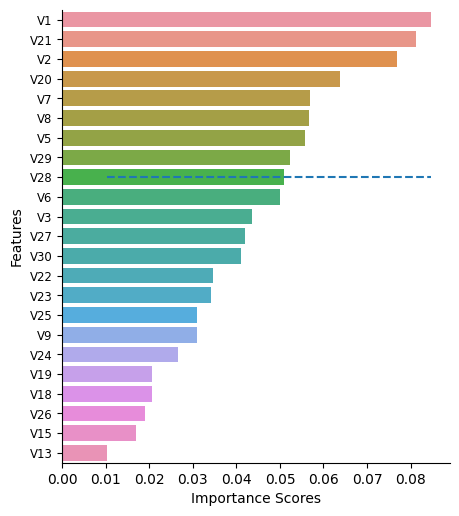

In [ ]:
kk_var = [0, 1, 2, 4, 5, 6, 7, 8, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

# Initialize the FRUFS object
# model_r - estimator object, default=DecisionTreeRegressor() The model which is used to regress current continuous feature given all other features.
# GradientBoostingRegressor, XGBregressor, LGBMregressor
model_frufs = FRUFS(k=8, n_jobs=-1, verbose=1, random_state=27)
# The fit_transform function is a wrapper for the fit and transform functions, individually.
# The fit function ranks the features and the transform function prunes the dataset to selected set of features

df_train_pruned = model_frufs.fit_transform(train_df.iloc[:,kk_var])
#df_train_pruned = model_frufs.fit_transform(one_train_df.iloc[:,kk_var])

plt.figure(figsize=(5, 6), dpi=100)
model_frufs.feature_importance()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  1.0min finished


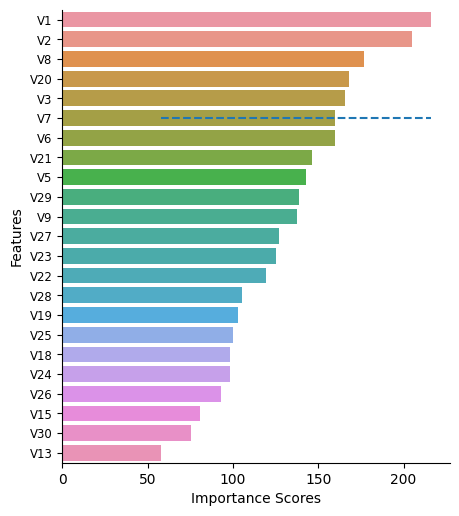

In [ ]:
model_frufs = FRUFS(model_r=LGBMRegressor(random_state=49), k=5, n_jobs=-1, verbose=1, random_state=49)
# The fit_transform function is a wrapper for the fit and transform functions, individually.
# The fit function ranks the features and the transform function prunes the dataset to selected set of features

df_train_pruned = model_frufs.fit_transform(train_df.iloc[:,kk_var])
#df_train_pruned = model_frufs.fit_transform(one_train_df.iloc[:,kk_var])

plt.figure(figsize=(5, 6), dpi=100)
model_frufs.feature_importance()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  6.9min finished


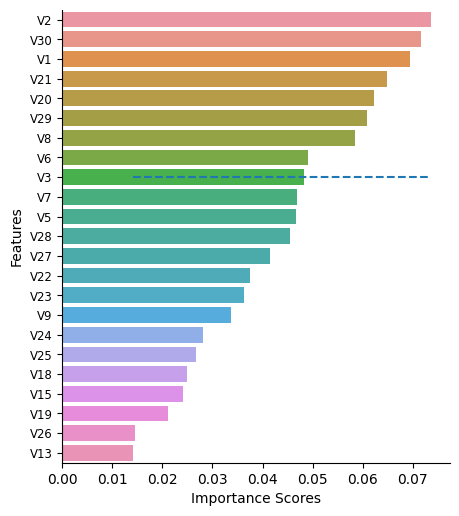

In [ ]:
from xgboost import XGBRegressor 
model_frufs = FRUFS(model_r= XGBRegressor(random_state=29), k=8, n_jobs=-1, verbose=1, random_state=29)
# The fit_transform function is a wrapper for the fit and transform functions, individually.
# The fit function ranks the features and the transform function prunes the dataset to selected set of features

#df_train_pruned = model_frufs.fit_transform(one_train_df.iloc[:,kk_var])
df_train_pruned = model_frufs.fit_transform(train_df.iloc[:,kk_var])

plt.figure(figsize=(5, 6), dpi=100)
model_frufs.feature_importance()

In [ ]:
! pip install concrete-autoencoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
kk_var = [0, 1, 2, 4, 5, 6, 7, 8, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
class WeightedLayer(tf.keras.layers.Layer):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", shape=(int(input_shape[-1]),))
    
    def call(self, inputs):
        return tf.multiply(inputs, self.kernel)

n_features = len(kk_var)

input_ = tf.keras.layers.Input(shape=(n_features,))
input_weighted = WeightedLayer(name="weighted_input")(input_)
dense_1 = tf.keras.layers.Dense(units=5, activation="relu")(input_weighted)
dense_2 = tf.keras.layers.Dense(units=4, activation="relu")(dense_1)
output = tf.keras.layers.Dense(units=3, activation="softmax")(dense_2)

model = tf.keras.Model(inputs=input_, outputs=output)

tf.keras.utils.plot_model(model, show_shapes=True)

AttributeError: ignored

In [ ]:
# from keras.optimizers import Adam => from tensorflow.keras.optimizers import Adam
from concrete_autoencoder import ConcreteAutoencoderFeatureSelector
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
import numpy as np
import tensorflow as tf

kk_var = [0, 1, 2, 4, 5, 6, 7, 8, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

def decoder(x):
    x = Dense(256)(x)
    x = BatchNormalization(momentum=0.1)(x)
    x = LeakyReLU(0.01)(x)

    x = Dense(128)(x)
    x = BatchNormalization(momentum=0.1)(x)
    x = LeakyReLU(0.01)(x)

    x = Dense(len(kk_var))(x)
    return x

selector = ConcreteAutoencoderFeatureSelector(K = 128, output_function = decoder, num_epochs = 1000)

selector.fit(train_df.iloc[:,kk_var], train_df.iloc[:,kk_var])

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 23)]              0         
                                                                 
 concrete_select (ConcreteSe  (None, 128)              2945      
 lect)                                                           
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896 

In [ ]:
selector.get_support(indices = True)

array([ 2, 13,  7, 12, 21,  2, 16, 19,  1, 10, 18, 16, 16, 11,  4,  8,  8,
        4, 22, 11, 14, 19,  5, 18, 18, 13, 17, 21, 19,  5, 10, 19, 21,  9,
        7, 11, 22, 15,  2, 11,  4,  2, 18,  7, 20, 10,  3,  0, 18, 11, 18,
       10, 22, 22, 20, 16, 16, 11, 15, 18,  1, 18,  8, 22,  8,  0,  6, 19,
       12,  8, 13,  7,  5, 18,  2,  3, 10,  0,  8, 16, 15, 15,  5,  6, 10,
       22,  7,  8,  3, 20, 19, 17, 19, 13,  1, 19, 10,  3, 14, 14, 13, 18,
        9, 22, 12, 12, 11, 16, 16,  6,  8,  7, 10,  2, 22,  4,  9, 18,  5,
       13,  7, 16,  9, 11,  0,  9, 13, 13])

Epoch 1/200
7116/7116 - 20s - loss: 0.3053 - lr: 0.0010 - 20s/epoch - 3ms/step
Epoch 2/200
7116/7116 - 15s - loss: 0.2200 - lr: 0.0010 - 15s/epoch - 2ms/step
Epoch 3/200
7116/7116 - 15s - loss: 0.1872 - lr: 0.0010 - 15s/epoch - 2ms/step
Epoch 4/200
7116/7116 - 15s - loss: 0.1647 - lr: 0.0010 - 15s/epoch - 2ms/step
Epoch 5/200
7116/7116 - 15s - loss: 0.1515 - lr: 0.0010 - 15s/epoch - 2ms/step
Epoch 6/200
7116/7116 - 15s - loss: 0.1384 - lr: 0.0010 - 15s/epoch - 2ms/step
Epoch 7/200
7116/7116 - 16s - loss: 0.1268 - lr: 0.0010 - 16s/epoch - 2ms/step
Epoch 8/200
7116/7116 - 15s - loss: 0.1165 - lr: 0.0010 - 15s/epoch - 2ms/step
Epoch 9/200
7116/7116 - 15s - loss: 0.1122 - lr: 0.0010 - 15s/epoch - 2ms/step
Epoch 10/200
7116/7116 - 15s - loss: 0.1060 - lr: 0.0010 - 15s/epoch - 2ms/step
Epoch 11/200
7116/7116 - 15s - loss: 0.1002 - lr: 0.0010 - 15s/epoch - 2ms/step
Epoch 12/200
7116/7116 - 16s - loss: 0.0956 - lr: 0.0010 - 16s/epoch - 2ms/step
Epoch 13/200
7116/7116 - 16s - loss: 0.0909 - lr:

KeyError: ignored

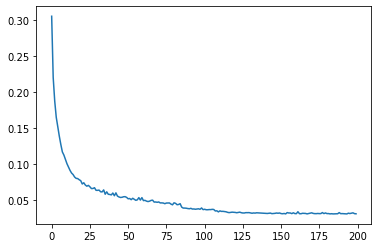

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import tensorflow as tf

class WeightedLayer(tf.keras.layers.Layer):    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)    
    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", shape=(int(input_shape[-1]),))
    def call(self, inputs):
        return tf.multiply(inputs, self.kernel)

# define encoder
n_inputs = len(kk_var)
visible = Input(shape=(n_inputs,))
input_weighted = WeightedLayer(name="weighted_input")(visible)

# encoder level 1
e = Dense(64)(input_weighted)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(128)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# bottleneck
#n_bottleneck = n_inputs
#bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
#d = Dense(128)(bottleneck)
d = Dense(128)(e)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(64)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)

# define autoencoder model
model = Model(inputs=visible, outputs=output)

# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

# fit the autoencoder model to reconstruct input
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=5, min_lr=1e-8, verbose = True)
history = model.fit(train_df, train_df, epochs=200, batch_size=16, verbose=2, callbacks=[reduce_lr]) 

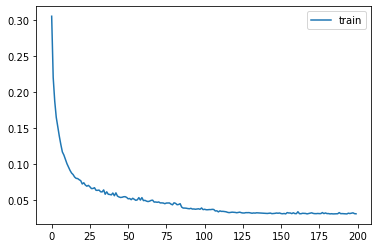

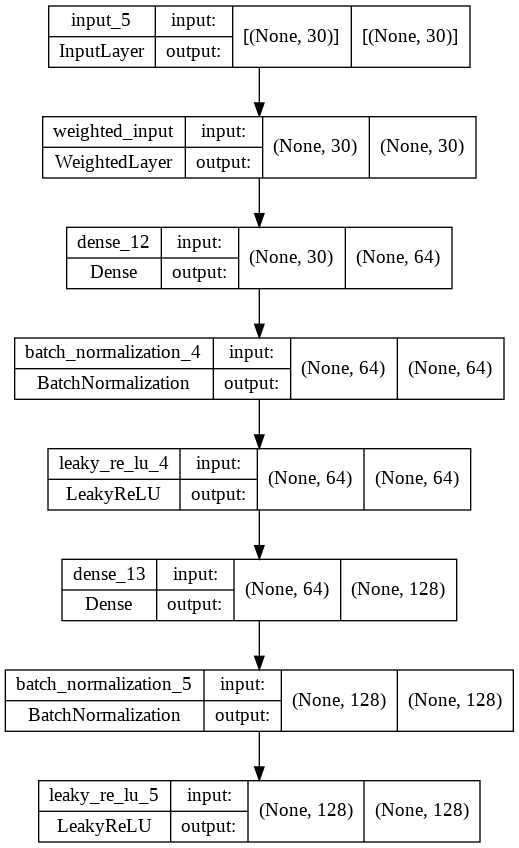

In [ ]:
#plot loss
pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=e)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)

# save the encoder to file
#encoder.save('encoder.h5')

In [ ]:
model.get_weights()[0]

array([-1.3197744 , -0.83348083,  1.1217878 , -0.6773597 , -0.7161086 ,
        0.5545836 , -0.7129054 , -0.45377696,  0.8376522 , -0.5088735 ,
       -0.7101785 ,  0.9359924 , -0.57419264, -0.4750906 , -0.7332613 ,
        0.6823003 ,  0.7225487 , -0.7227471 ,  0.6725286 , -0.49324092,
        0.46860358,  0.9786922 ,  0.5069137 ,  0.74912965,  1.2325164 ,
       -1.2897692 , -0.6674429 ,  0.5171633 , -0.38589722, -1.3924412 ],
      dtype=float32)

In [ ]:
selector.get_support(indices = True)

array([ 7, 11,  5,  6,  1,  3,  0,  2])